In [240]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [241]:
df=pd.read_csv('..\dati\WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [242]:
type(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


NoneType

In [243]:
df['prezzotot']=df['MonthlyCharges']*df['tenure']
df[['MonthlyCharges','tenure','TotalCharges','prezzotot','Churn']]
# il prezzo totale è divero dal total charges poichè il prezzo dell'abbonamento deve essere variato nel tempo.
# il prezzo dell'abbonamento nel tempo deve essersi alzato poichè, per gli utenti che hanno disdetto,
# il prezzo totale che avrebbero dovuto pagare è apparentemente più basso di ciò che hanno effettivamente pagato

,MonthlyCharges,tenure,TotalCharges,prezzotot,Churn
0,29.85,1,29.85,29.85,No
1,56.95,34,1889.5,1936.30,No
2,53.85,2,108.15,107.70,Yes
3,42.30,45,1840.75,1903.50,No
4,70.70,2,151.65,141.40,Yes
...,...,...,...,...,...
7038,84.80,24,1990.5,2035.20,No
7039,103.20,72,7362.9,7430.40,No
7040,29.60,11,346.45,325.60,No
7041,74.40,4,306.6,297.60,Yes


In [244]:
# df['TotalCharges'][480:489].astype(float)
df['TotalCharges'][480:490]

480     225.75
481       2145
482     1671.6
483     8003.8
484     680.05
485    6130.85
486       1415
487    6201.95
488           
489      74.35
Name: TotalCharges, dtype: object

In [245]:
df[df['TotalCharges'] == ' '].index


Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [246]:
df.shape

(7043, 22)

In [247]:
df=df.drop(df[df['TotalCharges'] == ' '].index)
df['TotalCharges']=df['TotalCharges'].astype(float)

In [248]:
df.shape

(7032, 22)

In [249]:
object_columns = df.select_dtypes(include='object')

In [250]:
object_columns

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,2234-XADUH,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,4801-JZAZL,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,8361-LTMKD,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [251]:
object_columns=object_columns.apply(lambda x: x.factorize()[0])
df_factorized=object_columns.join(df.select_dtypes(exclude='object'))

In [252]:
df_factorized.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,prezzotot
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,29.85,29.85,29.85
1,1,1,1,0,1,1,0,1,1,1,...,0,1,1,1,0,0,34,56.95,1889.50,1936.30
2,2,1,1,0,1,1,0,1,0,0,...,0,0,0,1,1,0,2,53.85,108.15,107.70
3,3,1,1,0,0,0,0,1,1,1,...,0,1,1,2,0,0,45,42.30,1840.75,1903.50
4,4,0,1,0,1,1,1,0,1,0,...,0,0,0,0,1,0,2,70.70,151.65,141.40


In [253]:
temp=df_factorized.loc[df_factorized.Churn == 1]
a=((temp['TotalCharges']>temp['prezzotot'])).sum()
b=((df['TotalCharges']>df['prezzotot'])).sum()
a,b,a/b
#il 23% delle persone che se ne sono andate paga più del dovuto


(738, 3204, 0.2303370786516854)

In [254]:
a1=((temp['TotalCharges']<temp['prezzotot'])).sum()
b1=((df['TotalCharges']<df['prezzotot'])).sum()
a1,b1,a1/b1
# no correlazione tra aumento di prezzo e la Churn

(750, 3214, 0.23335407591785937)

In [255]:
df_factorized.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,prezzotot
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,29.85,29.85,29.85
1,1,1,1,0,1,1,0,1,1,1,...,0,1,1,1,0,0,34,56.95,1889.50,1936.30
2,2,1,1,0,1,1,0,1,0,0,...,0,0,0,1,1,0,2,53.85,108.15,107.70
3,3,1,1,0,0,0,0,1,1,1,...,0,1,1,2,0,0,45,42.30,1840.75,1903.50
4,4,0,1,0,1,1,1,0,1,0,...,0,0,0,0,1,0,2,70.70,151.65,141.40


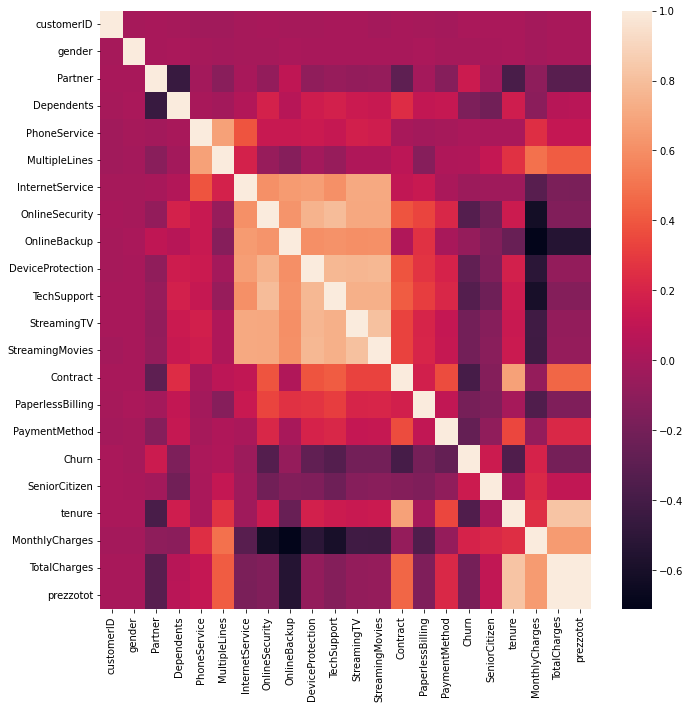

In [256]:
# plotting correlation heatmap
plt.figure(figsize=(11,11))
dataplot = sb.heatmap(df_factorized.corr())
  
# displaying heatmap

plt.savefig('..\img\correlation.jpg')
plt.show()


In [257]:
df_x=df_factorized["Churn"]
del df_factorized["Churn"]


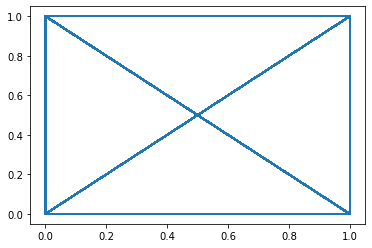

In [270]:
# figure, axis = plt.subplots(1,22)

# for i in range(df_factorized.shape[1]):
#         plt.plot(df_x,df_factorized.iloc[:,i])
plt.plot(df_x,df_factorized.iloc[:,3])

In [272]:
df_factorized

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,prezzotot
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,29.85,29.85,29.85
1,1,1,1,0,1,1,0,1,1,1,...,0,0,1,1,1,0,34,56.95,1889.50,1936.30
2,2,1,1,0,1,1,0,1,0,0,...,0,0,0,0,1,0,2,53.85,108.15,107.70
3,3,1,1,0,0,0,0,1,1,1,...,0,0,1,1,2,0,45,42.30,1840.75,1903.50
4,4,0,1,0,1,1,1,0,1,0,...,0,0,0,0,0,0,2,70.70,151.65,141.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7027,1,0,1,1,2,0,1,1,1,...,1,1,1,0,1,0,24,84.80,1990.50,2035.20
7039,7028,0,0,1,1,2,1,0,0,1,...,1,1,1,0,3,0,72,103.20,7362.90,7430.40
7040,7029,0,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,11,29.60,346.45,325.60
7041,7030,1,0,0,1,2,1,0,1,0,...,0,0,0,0,1,1,4,74.40,306.60,297.60
